In [31]:
from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"]
})

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,4.2)
plt.rcParams["figure.titlesize"] = 11 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 11 # control title size
plt.rcParams["axes.labelsize"] = 11 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 11 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 11 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "upper left" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markeredgewidth"] = 0.7
plt.rcParams["lines.markersize"] = 4 #data point size

plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7

# plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2) # remove unnecessary white space how i like it

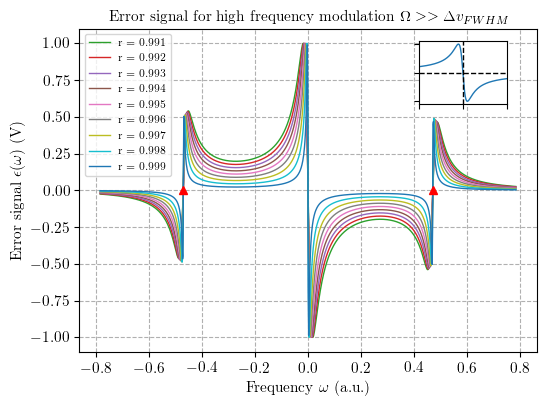

In [88]:
import numpy as np
import matplotlib.pyplot as plt


def error_signal(x, r, Ω):
    numerator = (np.exp(1j * x) * (-1 + np.exp(2 * 1j * x)) * 
                 (-1 + np.exp(1j * Ω)) * r**2 * 
                 (np.exp(1j * Ω) - r**2) * (-1 + r**2))

    denominator = ((np.exp(1j * x) - r**2) * 
                  (-1 + np.exp(1j * x) * r**2) * 
                  (-np.exp(1j * Ω) + np.exp(1j * x) * r**2) * 
                  (-r**2 + np.cos(x + Ω) + 1j * np.sin(x + Ω)))

    expr = numerator / denominator

    return np.imag(expr)


# # Define variables
# x = np.linspace(-0.25*np.pi, 0.25 * np.pi, 1000)  # Example range
# r = 0.995  # Example value for r
# Ω = np.pi*.15  # Example value for Omega

# # Translating the expression
# numerator = (np.exp(1j * x) * (-1 + np.exp(2 * 1j * x)) * 
#              (-1 + np.exp(1j * Ω)) * r**2 * 
#              (np.exp(1j * Ω) - r**2) * (-1 + r**2))

# denominator = ((np.exp(1j * x) - r**2) * 
#               (-1 + np.exp(1j * x) * r**2) * 
#               (-np.exp(1j * Ω) + np.exp(1j * x) * r**2) * 
#               (-r**2 + np.cos(x + Ω) + 1j * np.sin(x + Ω)))

# # Complex expression
# expr = numerator / denominator

# # Extract the imaginary part
# imaginary_part = np.imag(expr)



# Plot the error signal for different values of r
i = 1
x = np.linspace(-0.25*np.pi, 0.25 * np.pi, 1000)
for r in [0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999]:
    y = error_signal(x, r, Ω=np.pi*.15)
    
    plt.plot(x, y, label=f"r = {r}",color='C'+str(i+1))
    i += 1

plt.plot(np.pi*0.15, 0.00, 'r^',markersize=6)
plt.plot(-np.pi*0.15, 0.00, 'r^',markersize=6)

plt.xlabel(r'Frequency $\omega$ (a.u.)')
plt.ylabel(r'Error signal $\epsilon(\omega)$ (V)')
plt.legend()
plt.title(r'Error signal for high frequency modulation $\Omega >> \Delta v_{FWHM}$')

## plot an inset that zooms in on the error signal for r=0.9 close to x=0 and y=0 i.e. resonance
axins = plt.axes([0.7, 0.7, 0.15, 0.15]) # inset axes
axins.plot(x,error_signal(x,r=0.995,Ω=np.pi*.15))
axins.axvline(x=0, color='black', linestyle='--')
axins.axhline(y=0, color='black', linestyle='--')
axins.set_xlim(-0.1,0.1)
axins.set_ylim(-1.1,1.1)
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.grid(visible=False)
plt.draw()

# y = error_signal(x, r=0.995, Ω=np.pi*.15)

# # # Plot the imaginary part
# plt.plot(x, y, label="Imaginary Part")
# plt.xlabel(r'Frequency $\omega$ (a.u.)')
# plt.ylabel(r'Error signal $\epsilon(\omega)$ (V)')
# plt.legend()
# plt.title(r'Error signal for high frequency modulation $\Omega >> \Delta v_{FWHM}$')


plt.savefig('250507 ErrorSignalFastModulation.pdf', dpi=300)
